<a href="https://colab.research.google.com/github/smmurdock/Neural-Network-Sentiment-Analysis/blob/main/d604_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D604 Task 2 - Sentiment Analysis Using Neural Networks

In [32]:
cd /content/drive/MyDrive/1 Projects/_WGU | MS-DataAnalytics-DataScience/WGU | D604 - ADVANCED ANALYTICS/Task 2 - Sentiment Analysis Using Neural Networks

/content/drive/MyDrive/1 Projects/_WGU | MS-DataAnalytics-DataScience/WGU | D604 - ADVANCED ANALYTICS/Task 2 - Sentiment Analysis Using Neural Networks


## A. Research Purpose

> Describe the purpose of this data analysis by doing the following:

### A1. Research Question

> Summarize one research question that you will answer using a neural network model and NLP techniques. Be sure the research question is relevant to a real-world organizational situation and sentiment analysis captured in your chosen dataset or datasets.


  Note: If you choose to use more than one dataset, you must concatenate them into one dataset for parts II and III.

**Research Question:** Can a neural network be trained to accurately classify sentiment in customer product reviews from Amazon as either positive or negative?

This question is directly relevant to a real-world organizational situation. For a company like Amazon or any third-party seller on its platform, manually sifting through thousands of customer reviews to gauge public opinion is impractical based on the sheer volume of Amazon's product catalog. A system that can accurately classify sentiment allows an organization to quickly monitor customer feedback at scale. This enables them to identify popular product features, detect widespread product defects, determine if a product is likely to be returned, and track shifts in customer satisfaction over time, leading to faster product improvements and better customer service.

### A2. Objectives or Goals

> Define the objectives or goals of the data analysis. Be sure each objective or goal is reasonable within the scope of the research question and is represented in the available data.

The primary goals of this data analysis are to design, build, and evaluate a neural network for sentiment classification. The specific objectives are as follows:

* **Data Preprocessing:** To clean and prepare the raw text data from the Amazon reviews dataset for modeling.

* **Model Development:** To build and train a suitable neural network. This analysis will use an LSTM-based architecture, which is effective for learning from sequential data like text. The goal is to train the model to recognize patterns and contextual cues in word usage that indicate positive or negative sentiment.

* **Model Evaluation:** To assess the performance of the trained model on an unseen test dataset. The objective is to quantify its predictive accuracy using key classification metrics. This evaluation will directly answer how effectively the model can classify new, unseen review data.

### A3. Prescribed Network

> Identify an industry-relevant type of neural network capable of performing a text classification task that can be trained to produce useful predictions on text sequences on the selected dataset.

An appropriate and industry-relevant neural network for this text sentiment classification tasks is the **Long Short-Term Memory (LSTM)** neural network.

LSTMs are a type of Recurrent Neural Network (RNN) specifically designed to handle and learn from sequential data like text, where the order of text matters. Unlock standard networks, LSTMs have internal memory cells that can maintain information over long sequences. This capability is crucial for natural language processing because the meaning of a word often depends on its context. An LSTM can capture these dependencies, allowing it to understand nuances in language that are critical for accurately determining sentiment. This makes LSTMs a powerful and widely used tool for sentiment analysis in real-world applications.

## B. Data Preparation

> Summarize the data cleaning process by doing the following:

### B1. Data Exploration

> Perform exploratory data analysis on the chosen dataset, and include an explanation of each of the following elements:

  * presence of unusual characters (e.g., emojis, non-English characters)
  * vocabulary size
  * word embedding length
  * statistical justification for the chosen maximum sequence length

In [64]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the display options for better readability
pd.set_option('display.max_colwidth', 100)

The code cell above loads in the basic libraries needed to get started and sets the DataFrame's maximum column width to '100' for better readability.

In [65]:
# Load the data
df = pd.read_csv('amazon_cells_labelled.txt',
                 sep='\t',
                 header=None,
                 names=['review', 'sentiment'])

The code cell above loads in the the text file as a tab-delimited file with no headers identifying what the observations mean. Because of this, I looked at the data ahead of time and determined appropriate names to act as column headers.

In [66]:
# View the first few rows
print("First 5 rows:")
df.head()

First 5 rows:


,review,sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


The code cell above reads in the first five rows and gives a glimpse of how the data is formatted and what issues may present themselves. We can already seem some issues like use of punctuation, differences in casing, and missing spaces in between sentences.

In [67]:
# Check shape
print(f"Dataset shape: {df.shape}")
print(f"Total reviews: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")

Dataset shape: (1000, 2)
Total reviews: 1000
Total columns: 2


The code cell above uses Pandas DataFrame properties to check for how many rows and columns are present, indicating there are 1,000 rows and 2 columns. This is a fairly small, fairly simply DataFrame.

In [68]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print(f"\nTotal missing: {df.isnull().sum().sum()}")

Missing values:
review       0
sentiment    0
dtype: int64

Total missing: 0


The code cell above checks for the presence of any missing values. The presence of missing values determines the logical flow of EDA by determining if there are further preprocessing steps to take (e.g., remove the observations with missing data or fill the missing data with a determined value).

There are no missing values in this dataset, so we can move on without needing to address any missing values.

In [69]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")
print(f"Percentage of duplicates: {df.duplicated().sum() / len(df) * 100:.2f}%")

Number of duplicate rows: 10
Percentage of duplicates: 1.00%


The code cell above checks for the presence of any duplicate observations and how prevalent they are.

The code finds 10 instances of duplicates, which accounts for 1% of the total dataset.

In [71]:
# Find and examine duplicate reviews
duplicates = df[df.duplicated(subset=['review'], keep=False)]
duplicates_sorted = duplicates.sort_values('review')

print(f"Total duplicate entries: {len(duplicates)}")
print("\nSample of duplicate reviews:")
duplicates_sorted.head(20)

Total duplicate entries: 20

Sample of duplicate reviews:


,review,sentiment
446,Does not fit.,0
748,Does not fit.,0
180,Don't buy this product.,0
543,Don't buy this product.,0
402,Excellent product for the price.,1
892,Excellent product for the price.,1
792,Great Phone.,1
290,Great Phone.,1
187,Great phone!.,1
285,Great phone!.,1


The code cell above pulls out the duplicates and sorts them by ascending alphabetical order so that they are paired together by value rather than row ID. This step is valuable so we can determine if any of the duplicates appear to be legitimate or they appear to be actual duplicates.

Based on the small number of duplicates and the presence of the same unusual punctuation combinations appearing in a few of the examples, we can remove all duplicates while keeping the first occurrence.

In [72]:
# Remove exact duplicates, keeping the first occurrence
df_clean = df.drop_duplicates(keep='first')

print(f"Original dataset: {len(df)} rows")
print(f"After removing duplicates: {len(df_clean)} rows")
print(f"Duplicates removed: {len(df) - len(df_clean)}")

Original dataset: 1000 rows
After removing duplicates: 990 rows
Duplicates removed: 10


The code cell above removes the duplicate rows, keeping the first occurrence of the value and saving the results in a new copy of the DataFrame. It then checks the size of the cleaned DataFrame to confirm the removal of duplicates and compares the size to the original DataFrame.

In [73]:
# Check unique values in sentiment column
print("Unique sentiment values:")
print(df_clean['sentiment'].unique())
print(f"Number of unique sentiment values: {df_clean['sentiment'].nunique()}")

Unique sentiment values:
[0 1]
Number of unique sentiment values: 2


The code cell above checks the DataFrame's `'sentiment'` column for unique values to ensure that there are only the expected binary values of `0` for negative sentiment and `1` for positive sentiment. There are no unexpected values.

In [74]:
# Check for class balance
print("Sentiment distribution:")
print(df_clean['sentiment'].value_counts())
print("\nSentiment distribution (percentages):")
print(df_clean['sentiment'].value_counts(normalize=True) * 100)

Sentiment distribution:
sentiment
0    497
1    493
Name: count, dtype: int64

Sentiment distribution (percentages):
sentiment
0    50.20202
1    49.79798
Name: proportion, dtype: float64


The code cell above checks how balanced the sentiment is across negative and positive reviews, both in actual numbers and in proportion to the full remaining dataset.

After removing the duplicates, there are 497 negative reviews and 493 positive reviews. Based on the small difference, we can consider this dataset to be balanced.

This information is important to keep in mind for when we split our datasets into train/validation/test datasets later in step **B5. Steps to Prepare the Data**, as we'll want to keep the proportions while shuffling the data. This ensures that the model *can't* learn from patterns that occur based on what order the data was added to the dataset but that it *can* learn, validate, and test fairly across representative proportions.

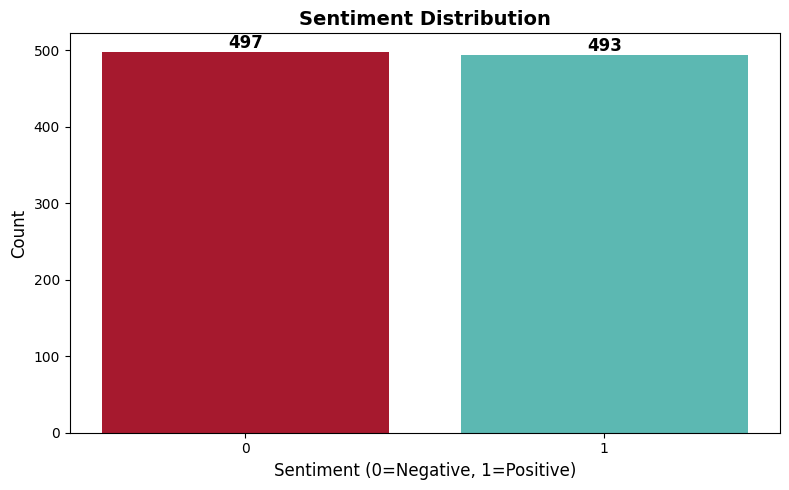

In [48]:
# Visualize class balance
plt.figure(figsize=(8, 5))
sentiment_counts = df_clean['sentiment'].value_counts()
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['#A6192E', '#5CB8B2'])

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Sentiment Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment (0=Negative, 1=Positive)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1])
plt.tight_layout()
plt.show()

The code cell above visualizes the class balance of negative and positive sentiment observations for the full cleaned dataset. The exact values are added above each bar because they are nearly indecipherable at a visual glance.

#### Presence of unusual characters

**Analyze Unusual Characters Before Cleaning**

Working definition of unusual characters: Any emojis, non-English characters, non-Unicode characters, punctuation, or control characters

In [84]:
# Load additional libraries
import re
import unicodedata
import string
from collections import Counter

In [85]:
# Create custom function to check for emojis, non-ASCII, punctuation, and numbers
def analyze_characters(text_series):
    """
    Analyze and categorize unusual characters using Unicode categories.

    References:
    - Python unicodedata module: https://docs.python.org/3/library/unicodedata.html
    - Unicode categories: https://www.unicode.org/reports/tr44/#General_Category_Values
    - Python string module: https://docs.python.org/3/library/string.html
    """

    all_text = ' '.join(text_series.astype(str))

    emojis = []
    non_ascii = []
    punctuation = []
    numbers = []

    for char in all_text:
        # Get Unicode category
        category = unicodedata.category(char)

        # Emojis (Symbols category)
        if category.startswith('So'):  # 'So' = Symbol, other
            emojis.append(char)

        # Non-ASCII (anything with code point > 127)
        elif ord(char) > 127:
            non_ascii.append(char)

        # Punctuation (using string.punctuation)
        elif char in string.punctuation:
            punctuation.append(char)

        # Numbers
        elif char.isdigit():
            numbers.append(char)

    return {
        'emojis': Counter(emojis),
        'non_ascii': Counter(non_ascii),
        'punctuation': Counter(punctuation),
        'numbers': Counter(numbers)
    }

In [86]:
char_analysis = analyze_characters(df_clean['review'])
char_analysis

{'emojis': Counter(),
 'non_ascii': Counter(),
 'punctuation': Counter({'.': 1070,
          ',': 292,
          '!': 164,
          '+': 1,
          '"': 19,
          "'": 179,
          '/': 8,
          '?': 7,
          '-': 74,
          ':': 4,
          ')': 29,
          '(': 26,
          '&': 7,
          '$': 9,
          '*': 4,
          ';': 9,
          '%': 2,
          '#': 2,
          '[': 1,
          ']': 1}),
 'numbers': Counter({'4': 10,
          '5': 37,
          '7': 10,
          '3': 23,
          '6': 5,
          '8': 11,
          '0': 43,
          '2': 45,
          '1': 33,
          '9': 2})}

#### Vocabulary size

#### Word embedding length

#### Statistical justification for maximum sequence length

### B2. Tokenization

> Describe the goals of the tokenization process, including any code generated and any packages that are used to normalize text during the process.

### B3. Padding Process

> Explain the padding process used to standardize the length of sequences. Include the following in your explanation:

  * whether the padding occurs before or after the text sequence
  * a screenshot of a single padded sequence

### B4. Categories of Sentiment

> Identify how many categories of sentiment will be used and provide an activation function for the final dense layer of the network.

### B5. Steps to Prepare the Data

> Explain the steps used to prepare the data for analysis, including the size of the training, validation, and test set split based on the industry average.

### B6. Prepared Dataset

> Provide a copy of the prepared dataset.

## C. Network Architecture

> Describe the type of neural network model used by doing the following:

### C1. Model Summary

> Provide the output of the model summary of the function from TensorFlow or PyTorch.

### C2. Network Architecture

> Discuss the number of layers, the type of layers, and the total number of parameters.

### C3. Hyperparameters

> Justify the choice of hyperparameters, including each of the following elements:

  * activation functions
  * number of nodes per layer
  * loss function
  * optimizer
  * stopping criteria

## D. Neural Network Model Evaluation

> Evaluate the model's training process and its relevant outcomes by doing the following:

### D1. Stopping Criteria

> Discuss the impact of using stopping criteria to include defining the number of epochs, including a screenshot showing the final training epoch.

### D2. Fitness

> Assess the fitness of the model and any actions taken to address overfitting or underfitting.

### D3. Training Process

> Provide clearly labeled visualizations of the model's training process and show the loss and accuracy metric.

### D4. Predictive Accuracy

> Discuss the predictive accuracy of the trained model using the chosen evaluation metric from part D3.

### D5. Ethical Standards Compliance

> Explain how the analysis complies with artificial intelligence (AI) global ethical standards and mitigates bias.

## E. Code

> Provide the code you used to save the trained model within the neural network.

## F. Functionality

> Discuss the functionality of your model, including the impact of your choice of network architecture.

## G. Recommendations

> Recommend a course of action based on your results as they relate to the research question.

## H. Reporting

> Submit a copy of your code and output in a PDF or HTML format.

In [44]:
# Convert notebook to HTML
!jupyter nbconvert --to html d604_task_2.ipynb

[NbConvertApp] Converting notebook d604_task_2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 383199 bytes to d604_task_2.html


## I. Sources for Third-Party Code

> Submit a list of all the specific web sources you used to acquire segments of third-party code to support the application.

* [Python String module](https://docs.python.org/3/library/string.html)
* [Python Unicodedata module](https://docs.python.org/3/library/unicodedata.html)
* [Unicode Character Categories](https://www.unicode.org/reports/tr44/#General_Category_Values)

## J. Sources

> Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

* Bourke, D. (2025). TensorFlow for Deep Learning Bootcamp: Zero to Mastery. Zero to Mastery. https://zerotomastery.io/courses/learn-tensorflow/